Understanding the Data

In [1]:
#importing the required libraries
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [2]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the data

Understanding the Data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

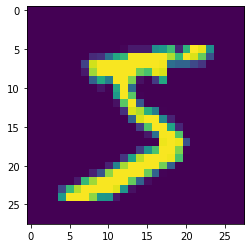

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Reshaping the data

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

Apply one-Hot Encoding

In [8]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,  number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model Building

Add CNN layer

In [10]:
#Creating the Model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation = 'softmax'))

Compiling Model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
number_of_classes = 10

Train the model

In [12]:
#Fitting the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=12, batch_size=128 )

Epoch 1/12
469/469 [==============================] - 16s 10ms/step - loss: 0.4001 - accuracy: 0.9424 - val_loss: 0.0876 - val_accuracy: 0.9728
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0636 - accuracy: 0.9799 - val_loss: 0.0708 - val_accuracy: 0.9780
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.0823 - val_accuracy: 0.9788
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0946 - val_accuracy: 0.9759
Epoch 5/12
469/469 [==============================] - 4s 10ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0943 - val_accuracy: 0.9785
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0998 - val_accuracy: 0.9788
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.1126 - val_accuracy: 0.9785
Epo

Observing the metrics

In [13]:
metrics =model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Acurracy):")
print(metrics)

Metrics(Test loss & Test Acurracy):
[0.13888290524482727, 0.979200005531311]


Test the Model

Predicting the output

In [14]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 91ms/step
[[3.77557584e-21 5.00259051e-28 4.95631059e-16 8.77862575e-14
  1.00281482e-31 8.71099137e-29 7.21834567e-33 1.00000000e+00
  6.39290155e-19 2.22877903e-20]
 [5.54134513e-17 2.87064501e-19 1.00000000e+00 1.28076831e-21
  2.29059199e-25 5.06082066e-30 6.61000001e-16 2.54251380e-26
  1.36814138e-16 7.98471347e-32]
 [4.59298737e-14 9.99999762e-01 2.60731134e-13 7.69471940e-16
  9.93373064e-08 1.36103354e-19 1.03347865e-07 1.69291488e-13
  3.10452469e-10 1.88041708e-20]
 [1.00000000e+00 1.60105525e-19 8.99191400e-18 1.47502651e-22
  2.52439004e-21 3.64006515e-19 1.77199981e-16 3.70361591e-25
  1.10750310e-15 1.99692939e-18]]


In [15]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save The model

In [16]:
model.save('models/mnistCNN.h5')

Test With saved model

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("models/mnistCNN.h5")


